This notebook contains the code needed to transform a product's rating into a pie chart. The rating is a score out of 5. The piechart presents the rating in the form of a percentage meaning the value of the rating is calculated as a percentage of the max value 5. The name of the product you're looking at can be seen in the pie chart. Make sure your repository is called KD-Project and that skincare_ontology.ttl is imported in GraphDB. 

In [1]:
%load_ext ipython_sparql_pandas

The following query is used to obtain the rating of the product. If you want to create a pie chart yourself, replace the name of the product between " " with the name of the product you want to see the rating of. NOTE: the name should be the exact same as the name when the product is presented to you in the recommendation engine. 

In [2]:
%%sparql http://localhost:7200/repositories/KD-Project -s rating
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX skincare: <http://www.semanticweb.org/skincare/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT * WHERE{  
    ?product skincare:hasName "Ibuki Softening Concentrate"@en; #change the name in case you want to visualize the rating of a different product
        skincare:hasName ?name;
        skincare:hasRating ?rating .
}

,product,name,rating
0,http://www.semanticweb.org/skincare/Ibuki%20So...,Ibuki Softening Concentrate,4.4


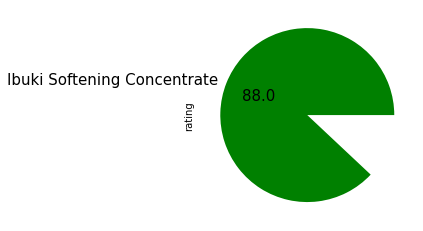

In [3]:
rating.set_index("name", inplace=True)
(rating["rating"]/5).plot.pie(
    normalize=False, 
    colors=["g"],
    autopct="%.1f",
    fontsize=15,
    figsize=(4, 4),
);

The following lines of code will present the number of products available in the application per brand in a certain category (e.g. Moisturizers), using the filters price and rating. The visualization is in the form of a horizontal bar chart. If you want to see the number of products within another range, simply adjust the integer and float in the FILTER for price and rating. In case you want to look at another type of product, change Moisturizer to the type of your liking. The types of products are: Cleanser, Eye_cream, Face_Mask, Moisturizer, Sun_Protection, and Treatment. Follow the comments in the query for more instructions.

In [4]:
%%sparql http://localhost:7200/repositories/KD-Project -s products
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX skincare: <http://www.semanticweb.org/skincare/>

SELECT ?brand (COUNT(*) as ?numberOfProducts) {
    ?brand skincare:isBrandOf ?product.
    ?product a skincare:Moisturizer. #you can replace Moisturize by the type of your liking. If no preference, delete this line
    ?product skincare:hasPrice ?price;
        skincare:hasRating ?rating.
    FILTER(?price < 50 && ?rating > 4.5) #replace the numbers to your liking
} GROUP BY ?brand

,brand,numberOfProducts
0,http://www.semanticweb.org/skincare/FIRST%20AI...,1
1,http://www.semanticweb.org/skincare/BELIF,2
2,http://www.semanticweb.org/skincare/HERBIVORE,1
3,http://www.semanticweb.org/skincare/SON%20%26%...,1
4,http://www.semanticweb.org/skincare/OLEHENRIKSEN,1
5,http://www.semanticweb.org/skincare/Dr.%20Jart%2B,1
6,http://www.semanticweb.org/skincare/Laneige,3
7,http://www.semanticweb.org/skincare/Shiseido,1
8,http://www.semanticweb.org/skincare/Kiehl%27s,2
9,http://www.semanticweb.org/skincare/FRESH,1


<AxesSubplot:>

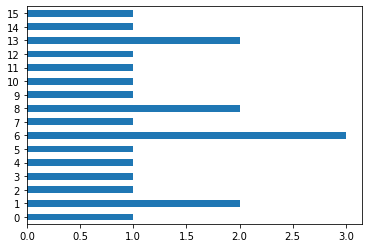

In [5]:
products['numberOfProducts'].plot.barh()